# Economic Data Analysis - Data scraping, cleaning, and exploration!

Raafi Rahman - Project 1

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
plt.style.use('ggplot')

from fredapi import Fred

import json

### Fred Object

In [2]:
with open('../secrets.json') as f:
    data = json.load(f)
    fred_key = data[0]['fred_api_key']
    
fred_key = fred_key

In [3]:
fred = Fred(api_key = fred_key)

### S&P 500

In [4]:
sp_search = fred.search('S&P')

<Axes: title={'center': 'S&P 500'}>

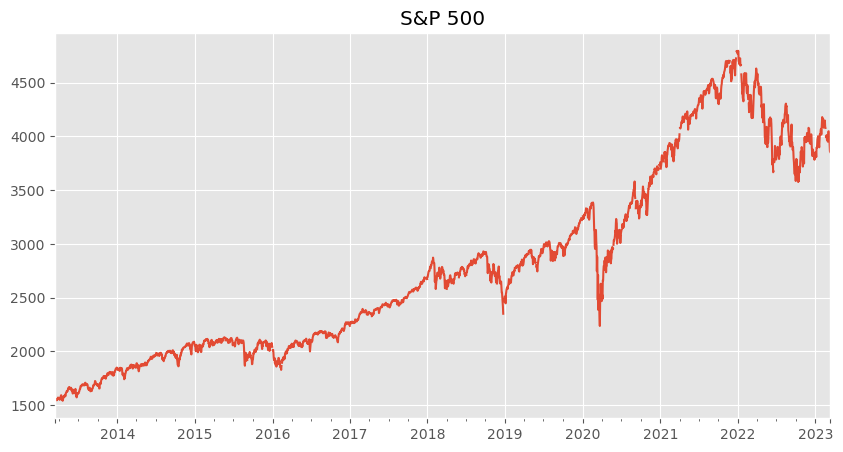

In [5]:
sp500 = fred.get_series('SP500')
sp500.plot(figsize = (10, 5), title = 'S&P 500')

### Unemployment Rate

<Axes: title={'center': 'Unemployment Rate'}>

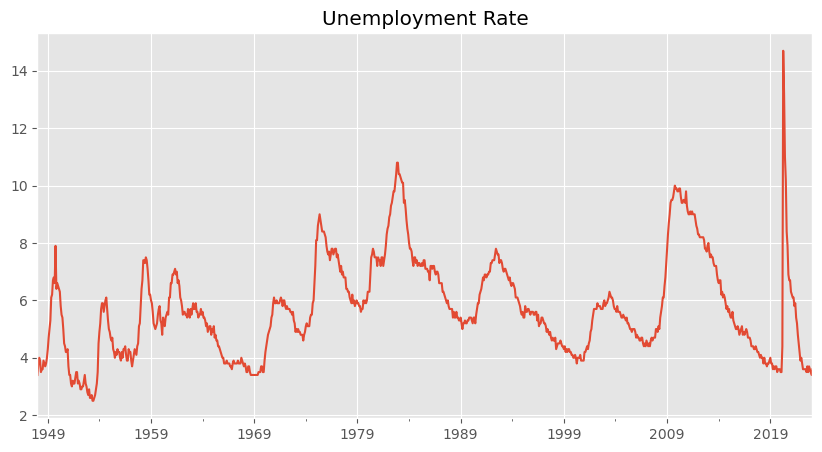

In [6]:
unrate = fred.get_series('UNRATE')
unrate.plot(figsize = (10, 5), title = 'Unemployment Rate')

### Unemplyment by State

In [7]:
unStateRate = fred.search('Unemployment state', filter = ('frequency', 'Monthly'))
unStateRate = unStateRate.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unStateRate = unStateRate.loc[unStateRate['title'].str.contains('Unemployment Rate')]

In [8]:
states = ['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
          'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
          'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana','Iowa',
          'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 
          'Michigan', 'Minnesota', 'Minor Outlying Islands', 'Mississippi', 'Missouri', 
          'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 
          'New York', 'North Carolina', 'North Dakota', 'Northern Mariana Islands', 'Ohio', 
          'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 
          'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'U.S. Virgin Islands', 
          'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

unStateRate = unStateRate.loc[unStateRate['title'].str.contains('|'.join(states))]

In [9]:
results = []

for i in unStateRate.index:
    stateTable = fred.get_series(i)
    stateTable = stateTable.to_frame(name = i)
    results.append(stateTable)

In [10]:
unrateStates = pd.concat(results, axis = 1).drop('PRUR', axis = 1)

In [11]:
id_to_state = unStateRate['title'].str.replace('Unemployment Rate in ', '').to_dict()
unrateStates.columns = [id_to_state[c] for c in unrateStates.columns]

### Plot Unemployment by State

In [12]:
px.line(unrateStates)

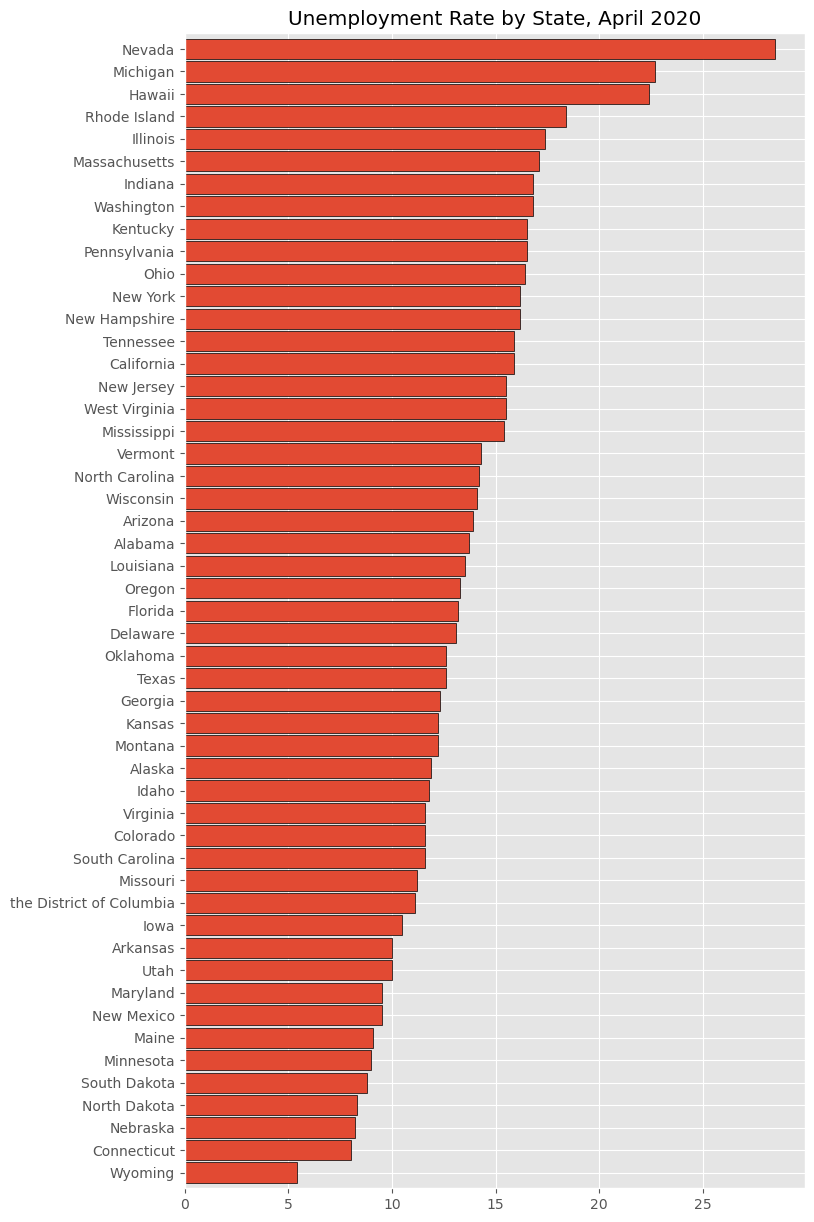

In [13]:
ax = unrateStates.loc[unrateStates.index == '2020-04-01'].T \
            .sort_values('2020-04-01') \
            .plot(kind = 'barh', figsize = (8, 15), width = .9, edgecolor = 'black',
                  title = 'Unemployment Rate by State, April 2020')
ax.legend().remove()
plt.show()

### Participation Rate

In [14]:
partRate = fred.search('participation state', filter = ('frequency', 'Monthly'))
partRate = partRate.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
partRate = partRate.loc[partRate['title'].str.contains('Participation Rate')]

In [15]:
partRate = partRate.loc[partRate['title'].str.contains('|'.join(states))]

In [16]:
partResults = []

for i in partRate.index:
    stateTable = fred.get_series(i)
    stateTable = stateTable.to_frame(name = i)
    partResults.append(stateTable)

In [17]:
partRateResults = pd.concat(partResults, axis = 1)

In [18]:
id_to_state = partRate['title'].str.replace('Labor Force Participation Rate for ', '').to_dict()
partRateResults.columns = [id_to_state[c] for c in partRateResults.columns]

### Unemployment Rate vs Participation Rate

In [19]:
unrateStates = unrateStates.drop('the District of Columbia', axis = 1)

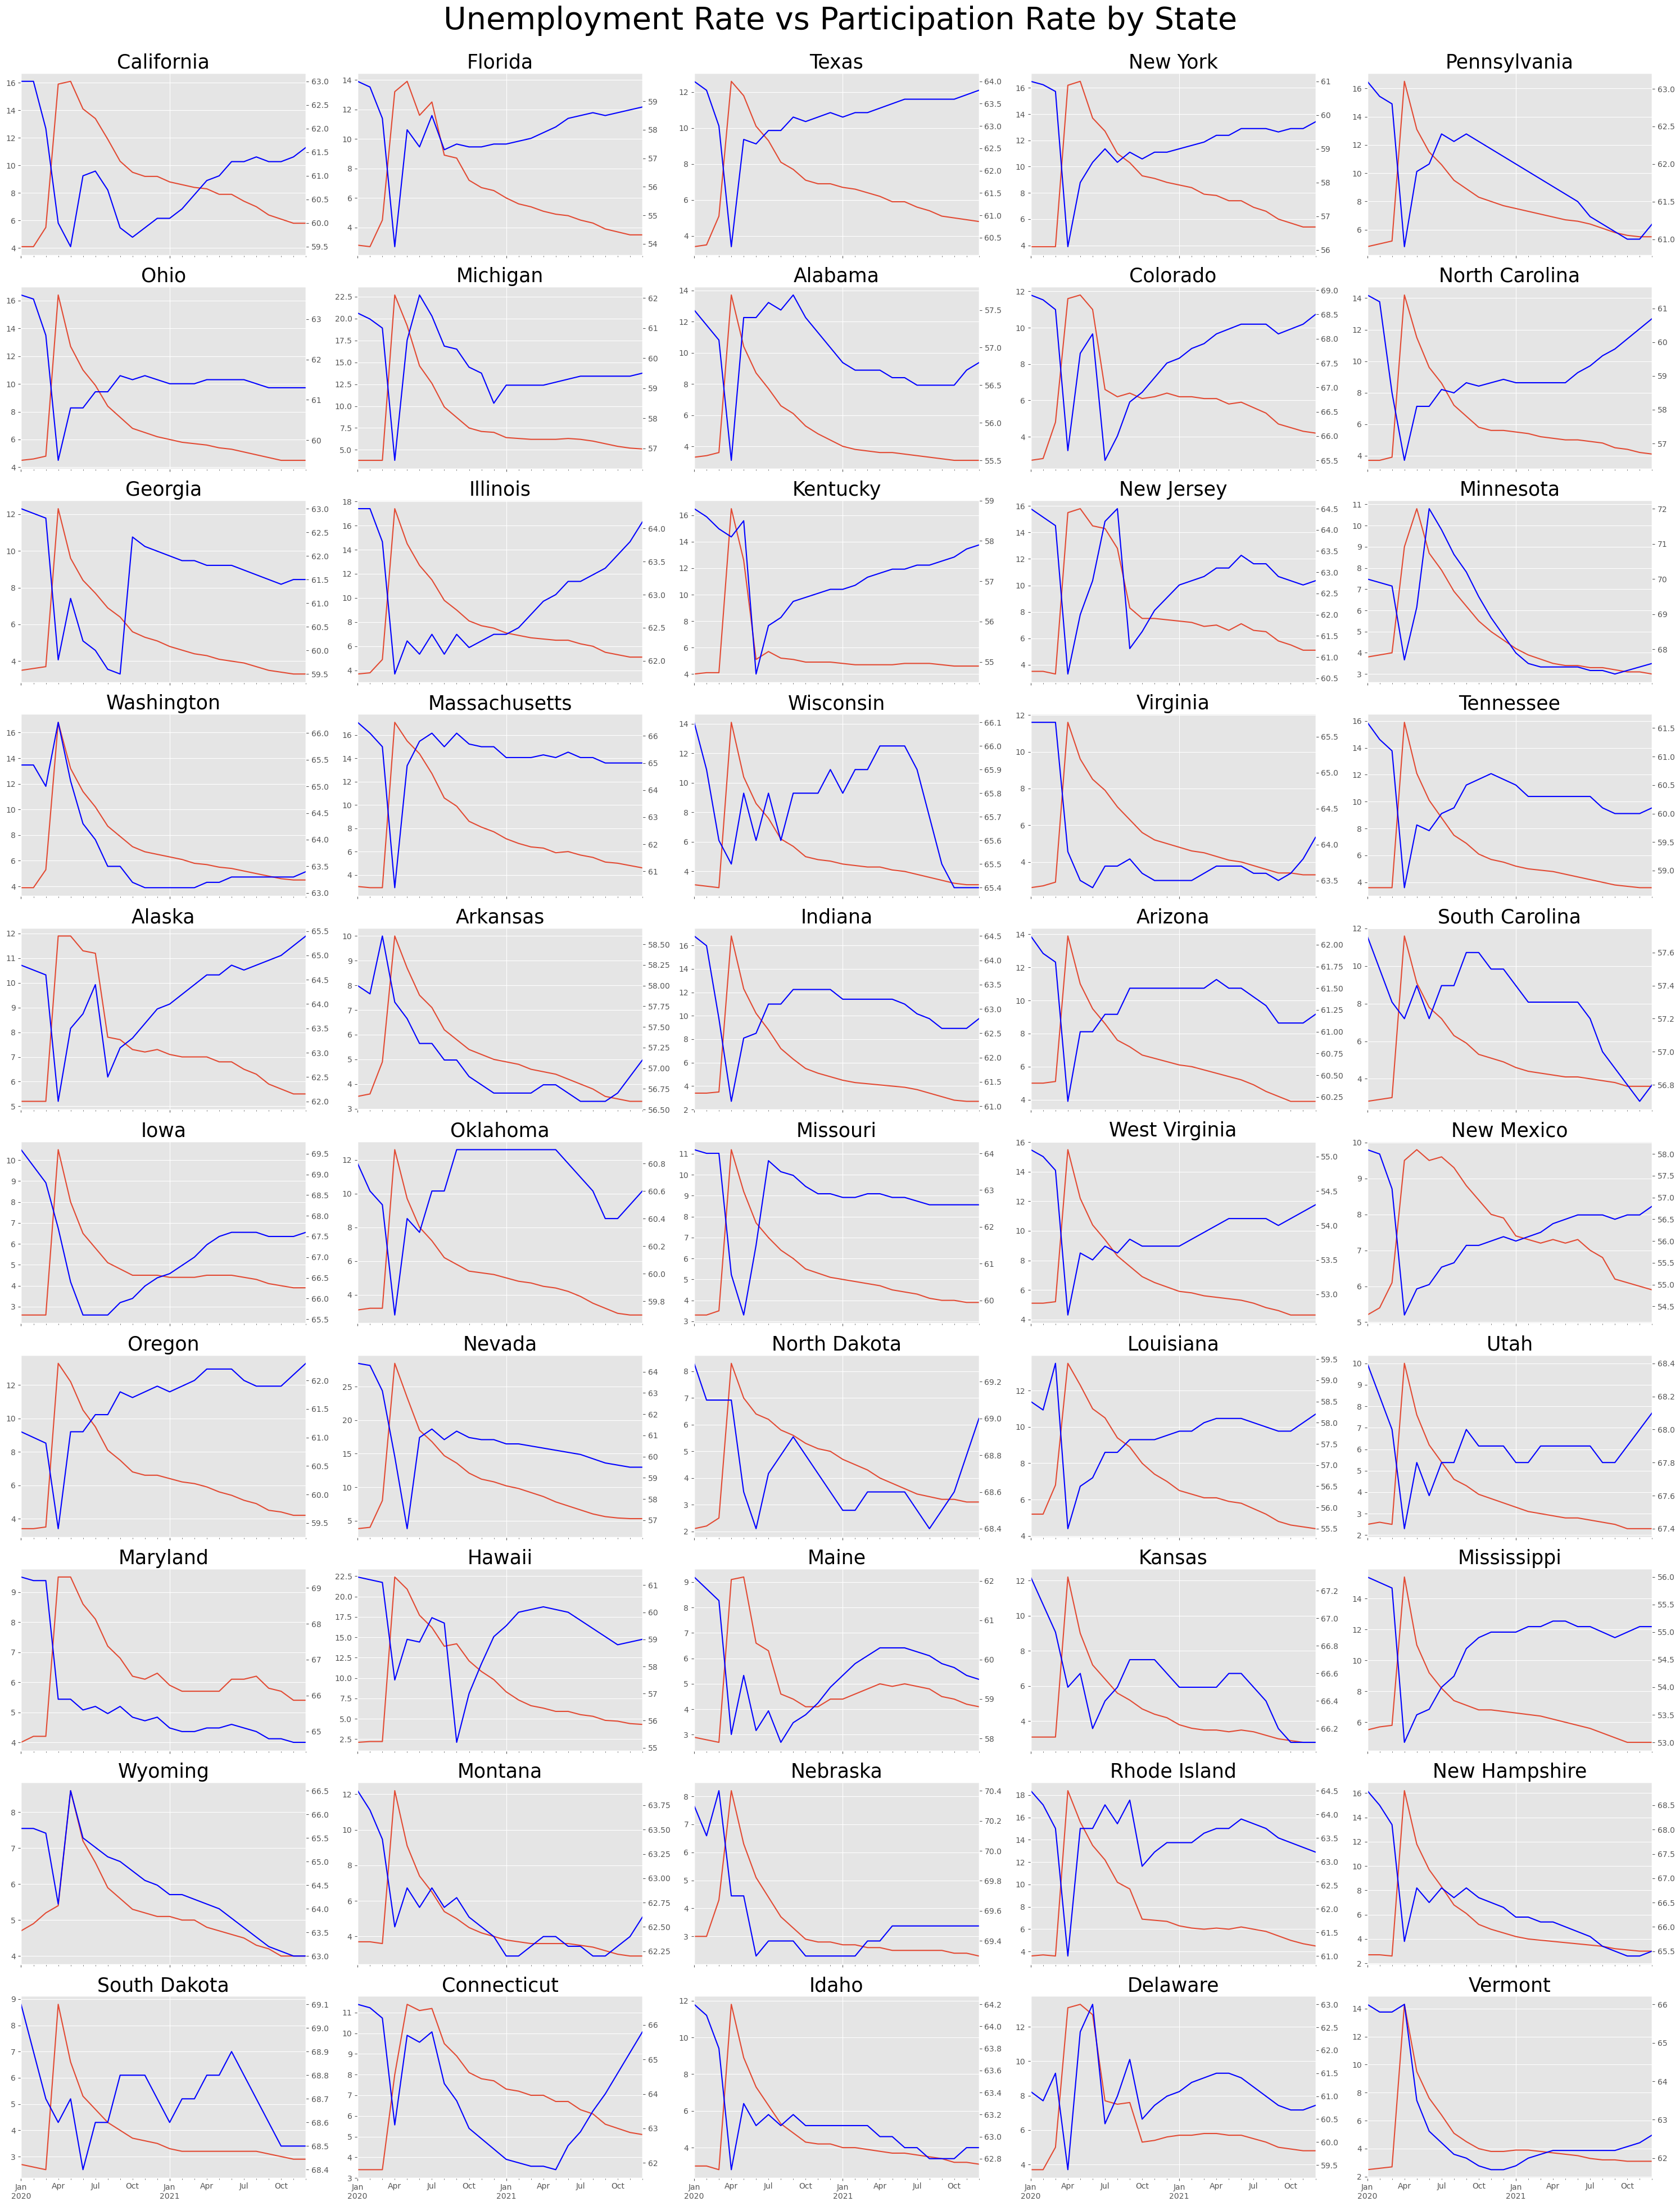

In [20]:
fig, axs = plt.subplots(10, 5, figsize = (30, 40), sharex = True)
axs = axs.flatten()

i = 0
for state in unrateStates.columns:
    ax2 = axs[i].twinx()
    unrateStates.query('index >= 2020 and index < 2022')[state] \
                        .plot(ax = axs[i], label = 'Unemployment Rate')
    partRateResults.query('index >= 2020 and index < 2022')[state] \
                        .plot(ax = ax2, label = 'Participation Rate', color = 'blue')
    ax2.grid(False)
    axs[i].set_title(state, fontsize = 25)
    i += 1
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Unemployment Rate vs Participation Rate by State', fontsize = 40)
plt.show()